## Import Libraries

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import img_to_array
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils 
from sklearn.metrics import classification_report

## Load Dataset from keras

In [16]:
from keras.datasets import cifar10

In [17]:
# loading in the data
     
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [18]:
# normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
    
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [19]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

## Training the model

In [ ]:
model = Sequential()

## Convolutional Layers

In [ ]:
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))

In [ ]:
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
model.add(Flatten())
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
model.add(Dense(class_num))
model.add(Activation('softmax'))

In [ ]:
epochs = 25
optimizer = 'adam'

## Results

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                        

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Epoch 1/25
782/782 [==============================] - 540s 688ms/step - loss: 1.5068 - accuracy: 0.4626 - val_loss: 1.3833 - val_accuracy: 0.5107
Epoch 2/25
782/782 [==============================] - 535s 684ms/step - loss: 1.0193 - accuracy: 0.6374 - val_loss: 0.8323 - val_accuracy: 0.7076
Epoch 3/25
782/782 [==============================] - 531s 679ms/step - loss: 0.8400 - accuracy: 0.7028 - val_loss: 0.9118 - val_accuracy: 0.6856
Epoch 4/25
782/782 [==============================] - 526s 672ms/step - loss: 0.7520 - accuracy: 0.7362 - val_loss: 0.8097 - val_accuracy: 0.7068
Epoch 5/25
782/782 [==============================] - 526s 673ms/step - loss: 0.6940 - accuracy: 0.7572 - val_loss: 0.7534 - val_accuracy: 0.7360
Epoch 6/25
782/782 [==============================] - 522s 667ms/step - loss: 0.6512 - accuracy: 0.7715 - val_loss: 0.6556 - val_accuracy: 0.7688
Epoch 7/25
782/782 [==============================] - 521s 667ms/step - loss: 0.6116 - accuracy: 0.7869 - val_loss: 0.6299 -

# **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Save the model**

In [2]:
model.save("model.h5")

NameError: ignored

# **Load the model**

In [6]:
model = keras.models.load_model('/content/gdrive/MyDrive/Final Project/model.h5')

# **Predictions**

In [10]:
classes = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck",
]

Automobile


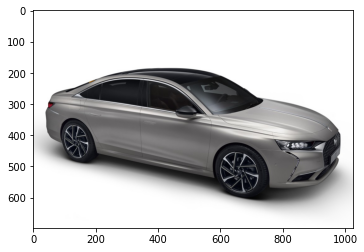

In [11]:
image = Image.open('/content/gdrive/MyDrive/Final Project/Sample images/automobile.jpg')
plt.imshow(image)
        
image = image.resize((32, 32))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255. 

pred = model.predict(image)
predict = classes[np.argmax(pred)]

print(predict)

Truck


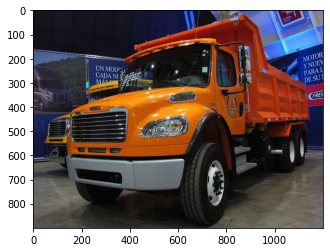

In [ ]:
image = Image.open('/content/gdrive/MyDrive/Final Project/Sample images/truck.jpg')
plt.imshow(image)
        
image = image.resize((32, 32))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255. 

pred = model.predict(image)
predict = classes[np.argmax(pred)]

print(predict)